In [1]:
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
%matplotlib inline


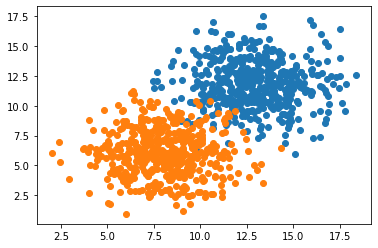

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13,2,n_pts),
               np.random.normal(12,2,n_pts)]).T
Xb = np.array([np.random.normal(8,2,n_pts),
               np.random.normal(6,2,n_pts)]).T 
    
X = np.vstack((Xa,Xb))
y = np.matrix(np.append(np.zeros(n_pts),np.ones(n_pts))).T 
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])


In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape =(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)#lr =  learning rate
model.compile(adam,loss='binary_crossentropy',metrics =  ['accuracy'])
h  = model.fit(x=X , y=y, verbose = 1,batch_size = 50 ,epochs = 500, shuffle  = 'true')

=======] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9763
Epoch 304/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9732
Epoch 305/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9756
Epoch 306/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9728
Epoch 307/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9691
Epoch 308/500
20/20 [==============================] - 0s 997us/step - loss: 0.0494 - accuracy: 0.9782
Epoch 309/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9583
Epoch 310/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9739
Epoch 311/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9762
Epoch 312/500
20/20 [==============================] - 0s 892us/step - loss: 0.0513 - accuracy: 0.9788
Epoch 313/500
20/20 [=========

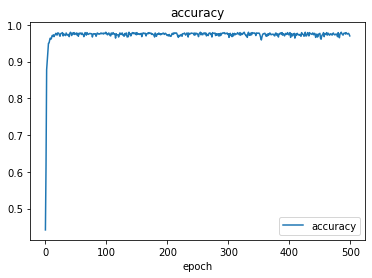

In [4]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

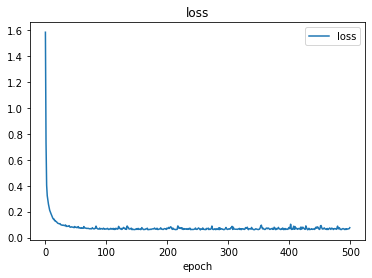

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [6]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0]) -1, max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1]) -1, max(X[:,1])+1,50)

    xx , yy = np.meshgrid(x_span,y_span)
    xx_, yy_ = xx.ravel(),yy.ravel()

    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx , yy ,z) 

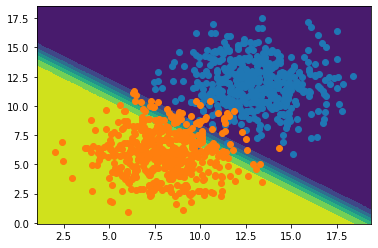

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
x  = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker="o",markersize=10,color='red')
print("prediction is",prediction)